In [1]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

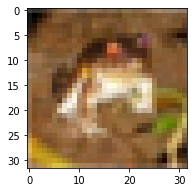

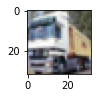

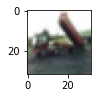

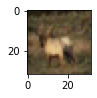

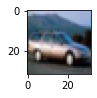

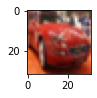

In [6]:
n = 6
plt.figure(figsize = (20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
  plt.show()

import useful libraries

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils

Normalize data

In [8]:
train_x = x_train.astype("float32")
test_x = x_test.astype("float32")

train_x = train_x/255.0
test_x = test_x/255.0

In [9]:
train_y = np_utils.to_categorical(y_train)
test_y = np_utils.to_categorical(y_test)

In [10]:
train_y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
test_y.shape

(10000, 10)

In [66]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
	# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [68]:
model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8783 - accuracy: 0.2984 - val_loss: 1.5731 - val_accuracy: 0.4242
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4943 - accuracy: 0.4518 - val_loss: 1.2901 - val_accuracy: 0.5408
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3339 - accuracy: 0.5169 - val_loss: 1.1736 - val_accuracy: 0.5805
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2142 - accuracy: 0.5622 - val_loss: 1.0862 - val_accuracy: 0.6162
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1227 - accuracy: 0.5987 - val_loss: 1.0467 - val_accuracy: 0.6240
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0495 - accuracy: 0.6269 - val_loss: 0.9527 - val_accuracy: 0.6625
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9973 - accuracy: 0.6468 - val_loss: 0.9277 - val_accu

In [69]:
_, acc = model.evaluate(test_x, test_y)
acc

313/313 [==============================] - 1s 4ms/step - loss: 0.6388 - accuracy: 0.7800


0.7799999713897705

In [70]:
from PIL import Image
import numpy as np

In [108]:
im = Image.open("icv-truck.jpg")

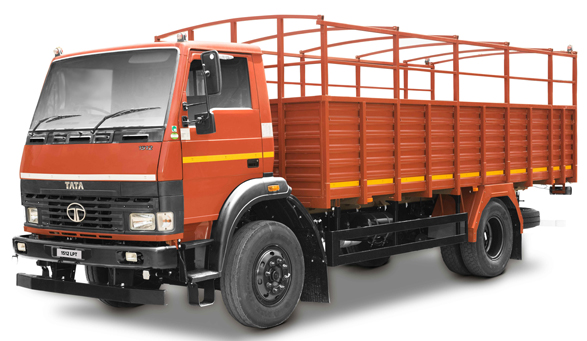

In [109]:
im

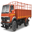

In [110]:
im = im.resize((32,32))
im

In [111]:
im = np.expand_dims(im, axis= 0)
im

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [252, 252, 252],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [112]:
im = np.array(im)
im

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [252, 252, 252],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [113]:
pred = model.predict([im])[0]
pred

1/1 [==============================] - 0s 17ms/step


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [114]:
pred = np.argmax(pred)
pred

9

In [115]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
results[pred]

'truck'